# Libraries 📚

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

# Our delay data 🧐

In [3]:
delay_df = pd.read_excel("get_around_delay_analysis.xlsx")
delay_df.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [4]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [5]:
delay_df.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


### Exploration 🔎

In [6]:
# Duplicates
delay_df.duplicated().sum()

0

In [7]:
# Missing values
print(delay_df.isnull().sum())
print()
print(delay_df.isnull().sum() / len(delay_df))

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

rental_id                                     0.000000
car_id                                        0.000000
checkin_type                                  0.000000
state                                         0.000000
delay_at_checkout_in_minutes                  0.232942
previous_ended_rental_id                      0.913609
time_delta_with_previous_rental_in_minutes    0.913609
dtype: float64


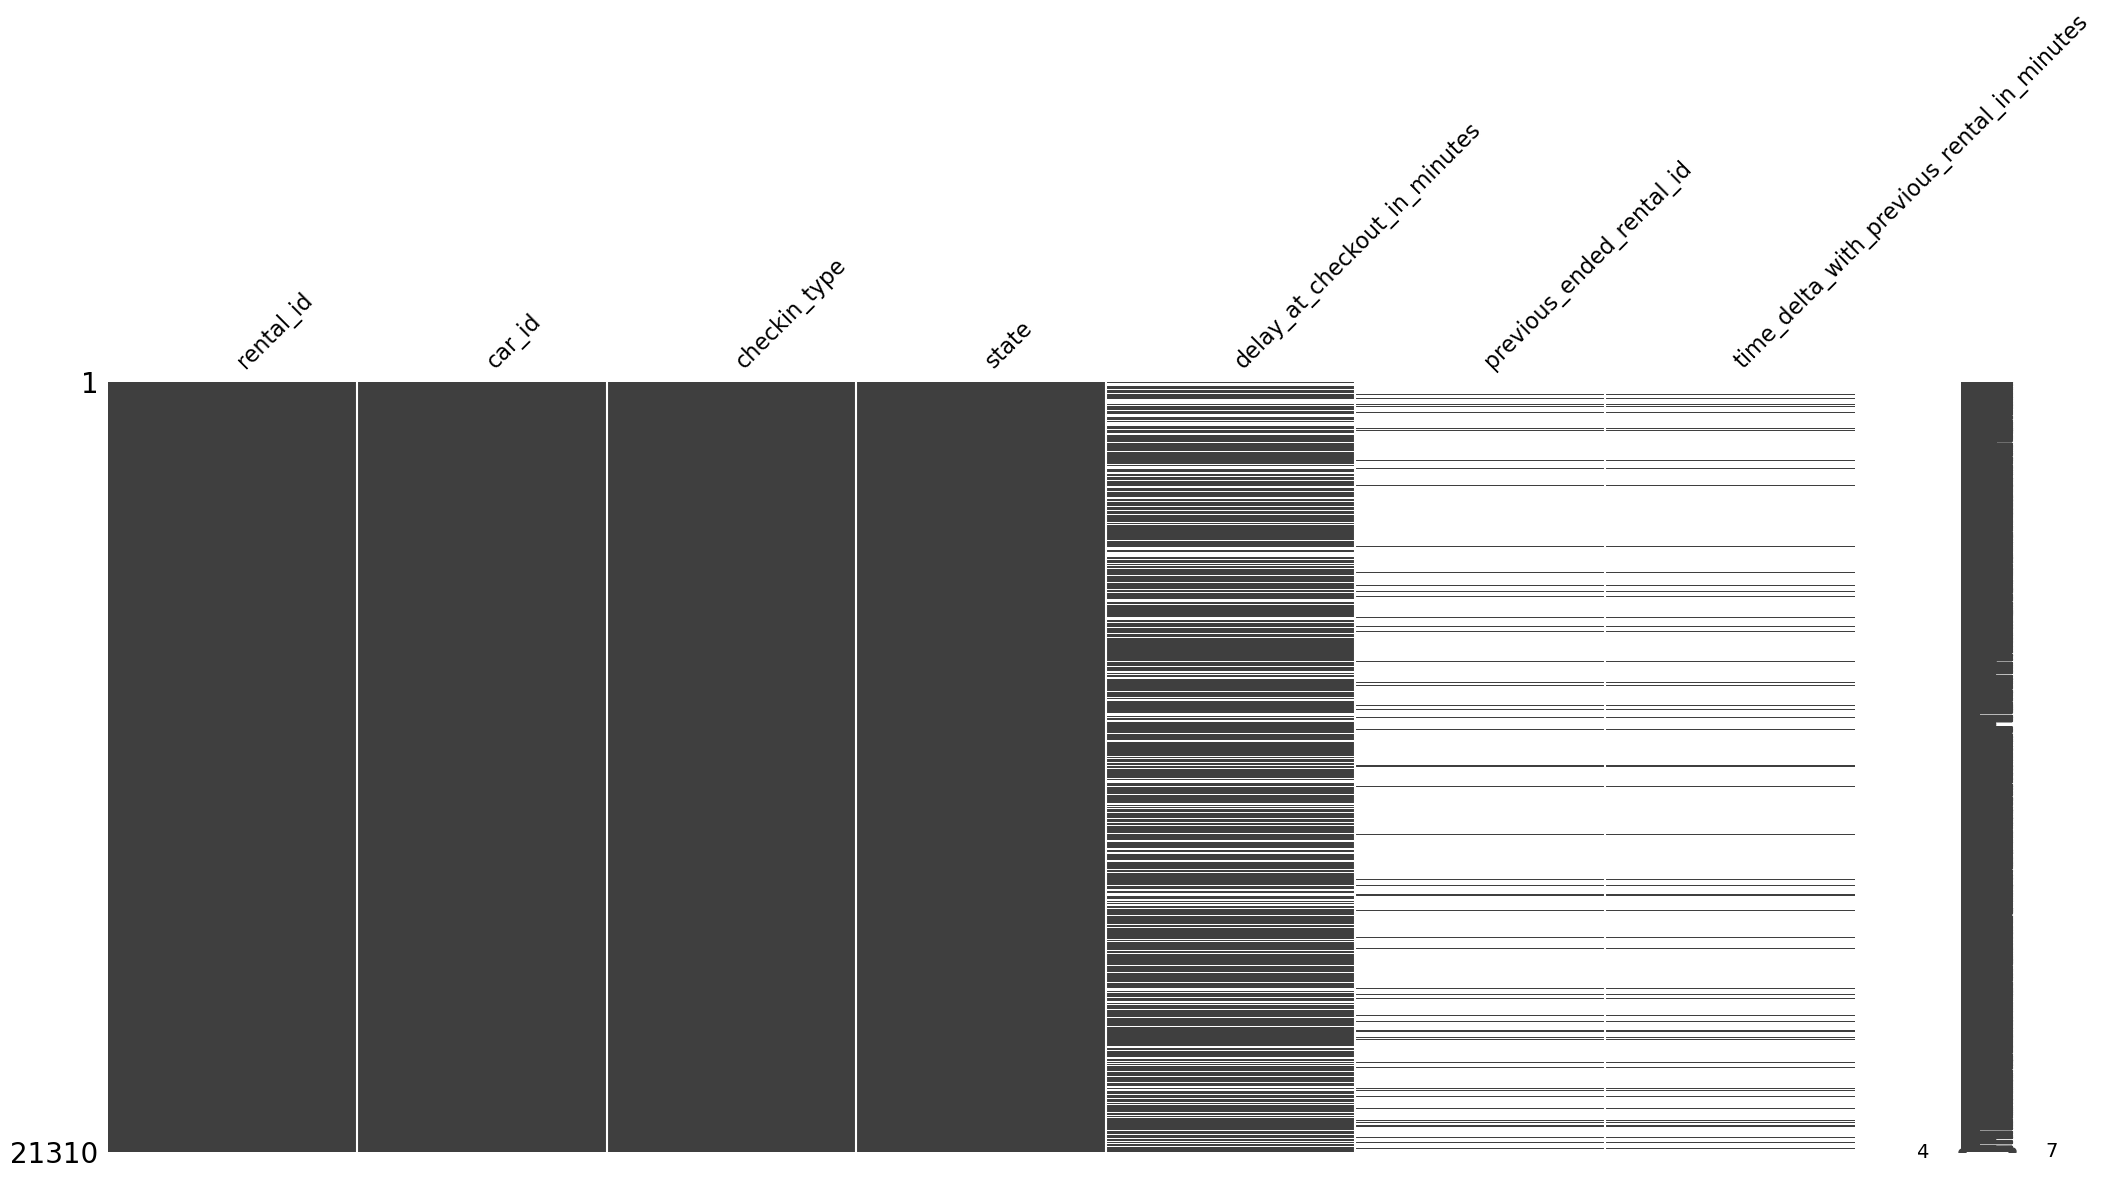

In [8]:
msno.matrix(delay_df)
plt.show()

Missing values ratio:
- delay_at_checkout_in_minutes                  0.232942
- previous_ended_rental_id                      0.913609
- time_delta_with_previous_rental_in_minutes    0.913609

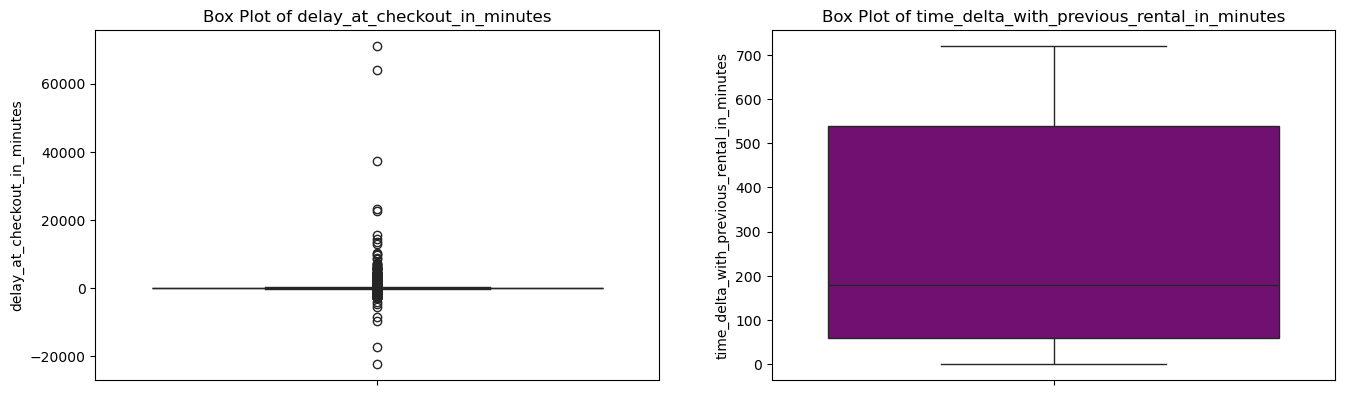

In [72]:
# Let's visualize the outliers
plt.figure(figsize=(16, 10))
#outlier_plt=plt.style.use('dark_background')
columns_to_check = ['delay_at_checkout_in_minutes', 'time_delta_with_previous_rental_in_minutes']

for i, column in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1) 
    sns.boxplot(data=delay_df, y=column, color="purple")
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.show()

Remarks:
- time_delta_with_previous_rental_in_minutes & previous_ended_rental_id have the same amount and i makes sense, there has to be a rent before so that a delay could occur
- only 10% of rents are consecutive 
- very few outliers in delay at check out 

In [10]:
columns_to_check_out = ['delay_at_checkout_in_minutes']
for column in columns_to_check_out:
    mean = delay_df[column].mean()
    std = delay_df[column].std()
    
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    # Filter out the outliers
    delay_clean = delay_df[(delay_df[column] >= lower_bound) & (delay_df[column] <= upper_bound)]

print(f"DataFrame shape before dropping outliers: {delay_df.shape}")
print(f"DataFrame shape after dropping outliers: {delay_clean.shape}")

DataFrame shape before dropping outliers: (21310, 7)
DataFrame shape after dropping outliers: (16276, 7)


(21310, 7)

In [100]:
delay_df.to_csv("delay_df.csv")

#### State and Check_in distribution

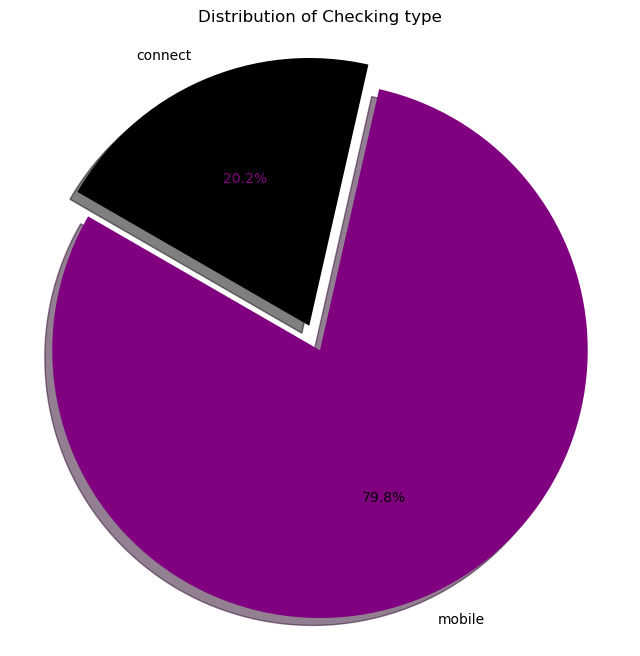

In [11]:
checking_counts = delay_df['checkin_type'].value_counts()

plt.figure(figsize=(8, 8), facecolor = "white")
patches, texts, autotexts  = plt.pie(checking_counts, labels=checking_counts.index, autopct='%1.1f%%', startangle=150, colors = ["purple", "black"], explode=(0.1, 0), shadow=True)
autotexts[1].set_color('purple')
plt.title('Distribution of Checking type')
plt.axis('equal')
plt.show()

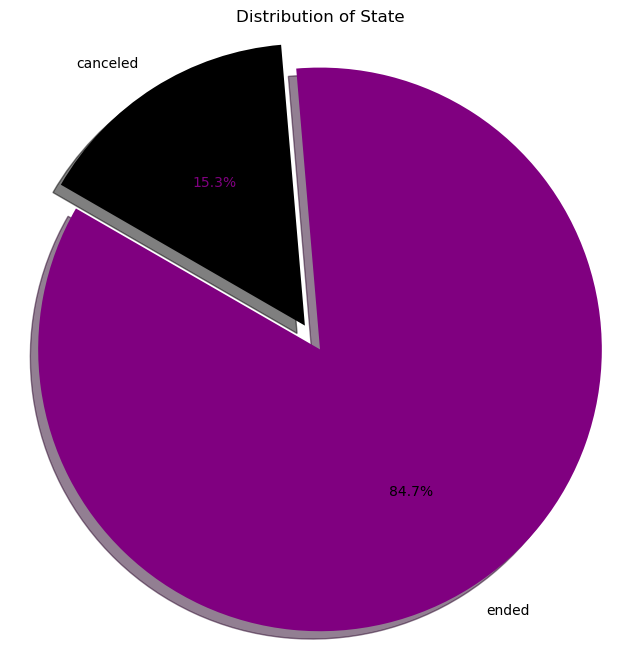

In [12]:
state_counts = delay_df['state'].value_counts()

plt.figure(figsize=(8, 8), facecolor = "white")
patches, texts, autotexts  = plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=150, colors = ["purple", "black"], explode=(0.1, 0), shadow=True)
autotexts[1].set_color('purple')
plt.title('Distribution of State')
plt.axis('equal')
plt.show()

In [13]:
effect_df = delay_df[['state', 'previous_ended_rental_id']].copy()
effect_df.columns = ['state', 'rent']

effect_df['rent'] = effect_df['rent'].apply(lambda x: 'not consecutive' if pd.isna(x) else 'consecutive')

pivot_table = effect_df.pivot_table(
    index='state',      
    columns='rent',  
    aggfunc='size', 
    fill_value=0
)

pivot_table

rent,consecutive,not consecutive
state,,
canceled,229,3036
ended,1612,16433


In [99]:
delay_df['state'].value_counts()

state
ended       18045
canceled     3265
Name: count, dtype: int64

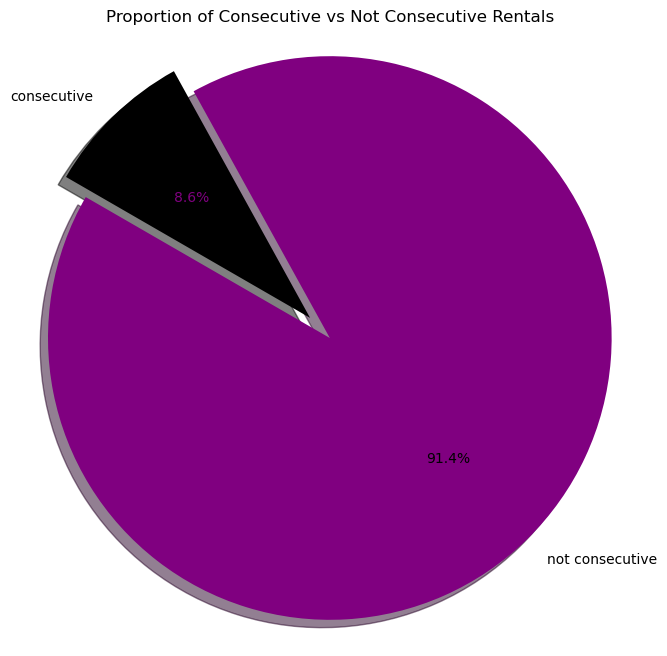

In [14]:
rent_counts = effect_df['rent'].value_counts()

plt.figure(figsize=(8, 8), facecolor = "white")
patches, texts, autotexts  = plt.pie(rent_counts, labels=rent_counts.index, autopct='%1.1f%%', startangle=150, colors = ["purple", "black"], explode=(0.1, 0), shadow=True)
autotexts[1].set_color('purple')
plt.title('Proportion of Consecutive vs Not Consecutive Rentals')
plt.axis('equal')
plt.show()

In [15]:
non_consecutive_df = delay_df[delay_df["previous_ended_rental_id"].isna()]
non_consecutive_df.isnull().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4638
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [16]:
previous_df = delay_df[['rental_id', 'checkin_type', 'delay_at_checkout_in_minutes']].rename(
    columns={
        'rental_id': 'previous_ended_rental_id',
        'checkin_type': 'previous_checkin_type',
        'delay_at_checkout_in_minutes': 'previous_delay_at_checkout_in_minutes'
    }
)

consecutive_df = pd.merge(delay_df, previous_df, on='previous_ended_rental_id')
consecutive_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_checkin_type,previous_delay_at_checkout_in_minutes
0,511639,370585,connect,ended,-15.0,563782.0,570.0,connect,136.0
1,519491,312389,mobile,ended,58.0,545639.0,420.0,mobile,140.0
2,521156,392479,mobile,ended,NaN,537298.0,0.0,mobile,NaN
3,525044,349751,mobile,ended,NaN,510607.0,60.0,mobile,-113.0
4,528808,181625,connect,ended,-76.0,557404.0,330.0,connect,-352.0


In [101]:
consecutive_df.to_csv("consecutive.csv")

#### Consecutive rents

How many canceled?

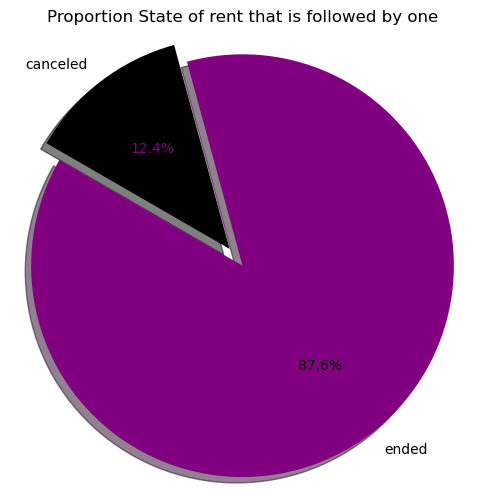

In [31]:
state_counts = consecutive_df['state'].value_counts()

plt.figure(figsize=(6, 6), facecolor = "white")
patches, texts, autotexts  = plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=150, colors = ["purple", "black"], explode=(0.1, 0), shadow=True)
autotexts[1].set_color('purple')
plt.title('Proportion State of rent that is followed by one')
plt.axis('equal')
plt.show()

How many lats Vs. on time

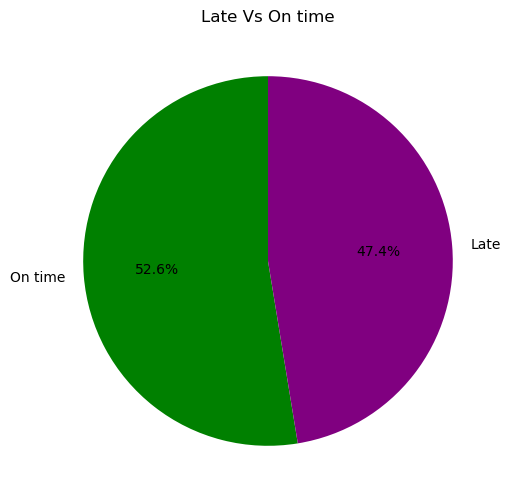

In [88]:
consecutive_df['delay_status'] = consecutive_df['previous_delay_at_checkout_in_minutes'].apply(lambda x: 'Late' if x > 0 else 'On time')

status_counts = consecutive_df['delay_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['green', 'purple'], startangle=90)
plt.title('Late Vs On time')
plt.show()

Among the late cases how many following rents were cancelled?

state
ended       767
canceled    106
Name: count, dtype: int64


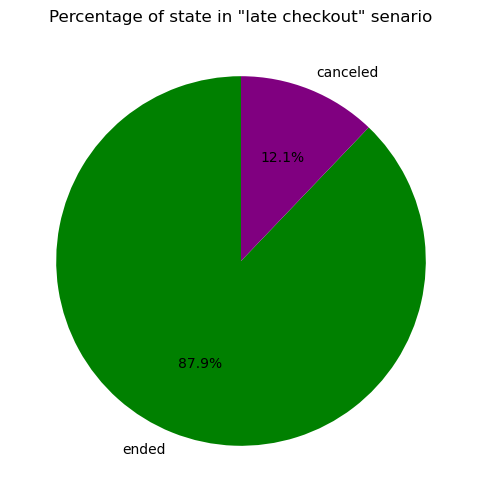

In [30]:
late = consecutive_df[consecutive_df['previous_delay_at_checkout_in_minutes'] > 0]

state_counts = late['state'].value_counts()
print(state_counts)

plt.figure(figsize=(6, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', colors=['green', 'purple'], startangle=90)
plt.title('Percentage of state in "late checkout" senario')
plt.show()

Delay distribution

C:\Users\Malika\AppData\Local\Temp\ipykernel_9692\2575924383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['delay_bins'] = pd.cut(df_cleaned['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)


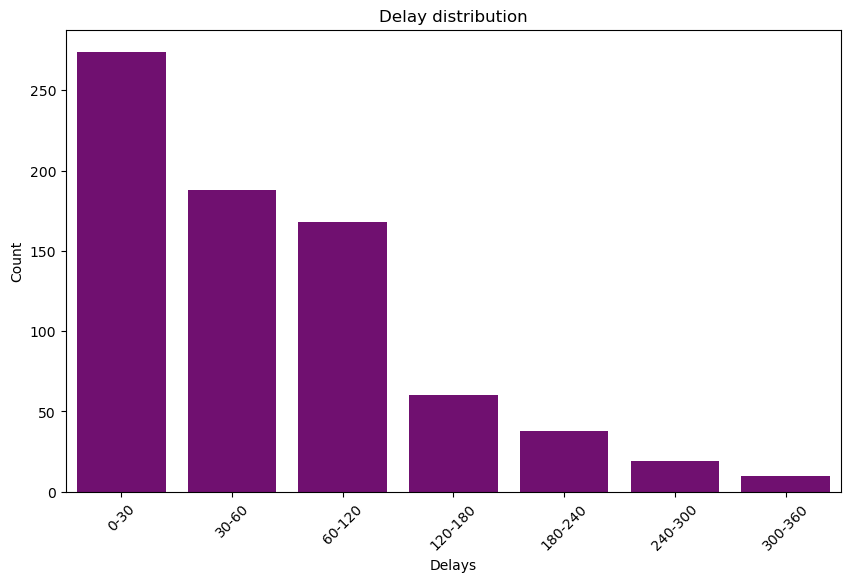

In [36]:
df_cleaned = consecutive_df.dropna(subset=['delay_at_checkout_in_minutes'])

bins = [0, 30, 60, 120, 180, 240, 300, 360]
labels = ['0-30', '30-60', '60-120', '120-180', '180-240', '240-300', '300-360']
df_cleaned['delay_bins'] = pd.cut(df_cleaned['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)

count_data = df_cleaned['delay_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=count_data.index, y=count_data.values, color="purple")
plt.title('Delay distribution')
plt.xlabel('Delays')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

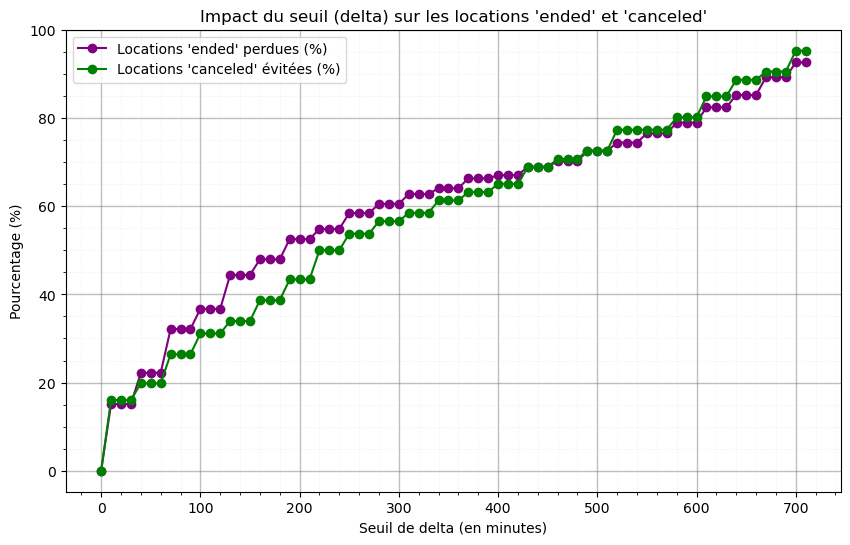

In [102]:
ended_rentals = consecutive_df[(consecutive_df['state'] == 'ended')]

canceled_due_to_delay = consecutive_df[(consecutive_df['state'] == 'canceled') & (consecutive_df['previous_delay_at_checkout_in_minutes'] > 0)]

total_ended = len(ended_rentals)
total_canceled_due_to_delay = len(canceled_due_to_delay)

thresholds = range(0, 720, 10) 
lost_ended_percentage = []
reduced_canceled_percentage = []

for threshold in thresholds:
    count_lost_ended = len(ended_rentals[ended_rentals['time_delta_with_previous_rental_in_minutes'] < threshold])
    lost_ended_percentage.append((count_lost_ended / total_ended) * 100)
    
    count_reduced_canceled = len(canceled_due_to_delay[canceled_due_to_delay['time_delta_with_previous_rental_in_minutes'] < threshold])
    reduced_canceled_percentage.append((count_reduced_canceled / total_canceled_due_to_delay) * 100)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, lost_ended_percentage, marker='o', linestyle='-', color='purple', label="Locations 'ended' perdues (%)")
plt.plot(thresholds, reduced_canceled_percentage, marker='o', linestyle='-', color='green', label="Locations 'canceled' évitées (%)")

plt.title("Impact du seuil (delta) sur les locations 'ended' et 'canceled'")
plt.xlabel("Seuil de delta (en minutes)")
plt.ylabel("Pourcentage (%)")
plt.legend()

plt.minorticks_on()
plt.grid(True, which='both', axis='both', linestyle='-', color='gray', alpha=0.5)
plt.grid(True, which='major', linestyle='-', linewidth=1, color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray')

plt.show()


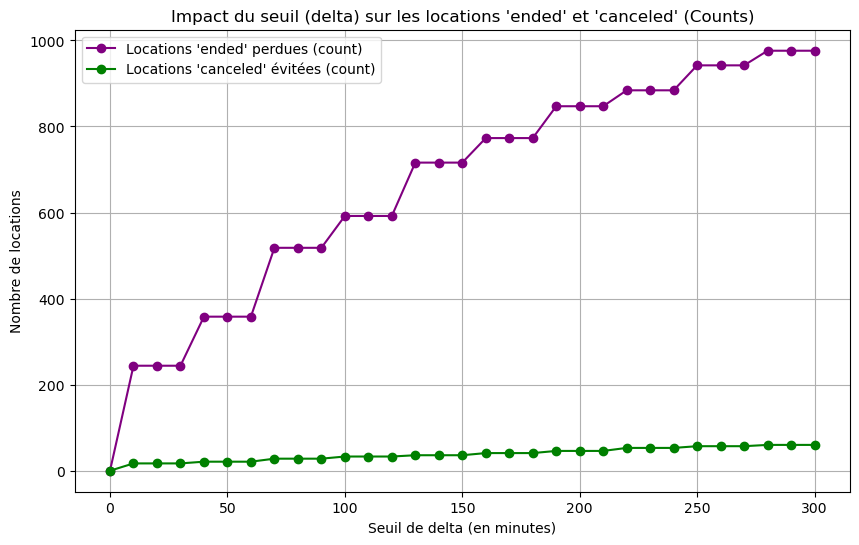

In [71]:
ended_rentals = consecutive_df[consecutive_df['state'] == 'ended']
canceled_due_to_delay = consecutive_df[(consecutive_df['state'] == 'canceled') & (consecutive_df['previous_delay_at_checkout_in_minutes'] > 0)]

thresholds = range(0, 301, 10) 
count_lost_ended = []
count_reduced_canceled = []

for threshold in thresholds:
    count_lost_ended_count = len(ended_rentals[ended_rentals['time_delta_with_previous_rental_in_minutes'] < threshold])
    count_lost_ended.append(count_lost_ended_count)

    count_reduced_canceled_count = len(canceled_due_to_delay[canceled_due_to_delay['time_delta_with_previous_rental_in_minutes'] < threshold])
    count_reduced_canceled.append(count_reduced_canceled_count)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, count_lost_ended, marker='o', linestyle='-', color='purple', label="Locations 'ended' perdues (count)")

plt.plot(thresholds, count_reduced_canceled, marker='o', linestyle='-', color='green', label="Locations 'canceled' évitées (count)")

plt.title("Impact du seuil (delta) sur les locations 'ended' et 'canceled' (Counts)")
plt.xlabel("Seuil de delta (en minutes)")
plt.ylabel("Nombre de locations")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
consecutive_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_checkin_type,previous_delay_at_checkout_in_minutes,delay_status
0,511639,370585,connect,ended,-15.0,563782.0,570.0,connect,136.0,Late
1,519491,312389,mobile,ended,58.0,545639.0,420.0,mobile,140.0,Late
2,521156,392479,mobile,ended,NaN,537298.0,0.0,mobile,NaN,On time
3,525044,349751,mobile,ended,NaN,510607.0,60.0,mobile,-113.0,On time
4,528808,181625,connect,ended,-76.0,557404.0,330.0,connect,-352.0,On time


MOBILE

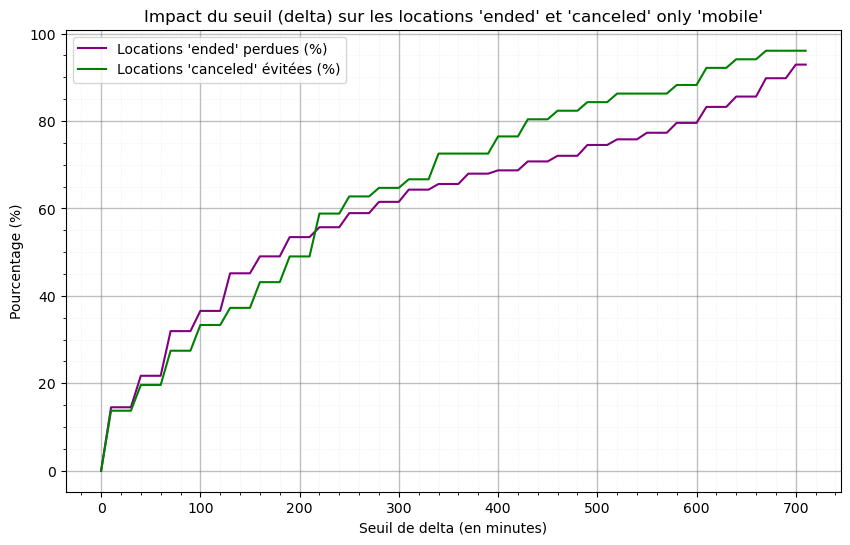

In [91]:
ended_rentals = consecutive_df[(consecutive_df['state'] == 'ended') & (consecutive_df['checkin_type']== 'mobile')]

canceled_due_to_delay = consecutive_df[(consecutive_df['state'] == 'canceled') & (consecutive_df['previous_delay_at_checkout_in_minutes'] > 0) & (consecutive_df['checkin_type']== 'mobile')]

total_ended = len(ended_rentals)
total_canceled_due_to_delay = len(canceled_due_to_delay)

thresholds = range(0, 720, 10) 
lost_ended_percentage = []
reduced_canceled_percentage = []

for threshold in thresholds:
    count_lost_ended = len(ended_rentals[ended_rentals['time_delta_with_previous_rental_in_minutes'] < threshold])
    lost_ended_percentage.append((count_lost_ended / total_ended) * 100)
    
    count_reduced_canceled = len(canceled_due_to_delay[canceled_due_to_delay['time_delta_with_previous_rental_in_minutes'] < threshold])
    reduced_canceled_percentage.append((count_reduced_canceled / total_canceled_due_to_delay) * 100)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, lost_ended_percentage, linestyle='-', color='purple', label="Locations 'ended' perdues (%)")
plt.plot(thresholds, reduced_canceled_percentage, linestyle='-', color='green', label="Locations 'canceled' évitées (%)")

plt.title("Impact du seuil (delta) sur les locations 'ended' et 'canceled' only 'mobile'")
plt.xlabel("Seuil de delta (en minutes)")
plt.ylabel("Pourcentage (%)")
plt.legend()

plt.minorticks_on()
plt.grid(True, which='both', axis='both', linestyle='-', color='gray', alpha=0.5)
plt.grid(True, which='major', linestyle='-', linewidth=1, color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray')

plt.show()

CONNECT

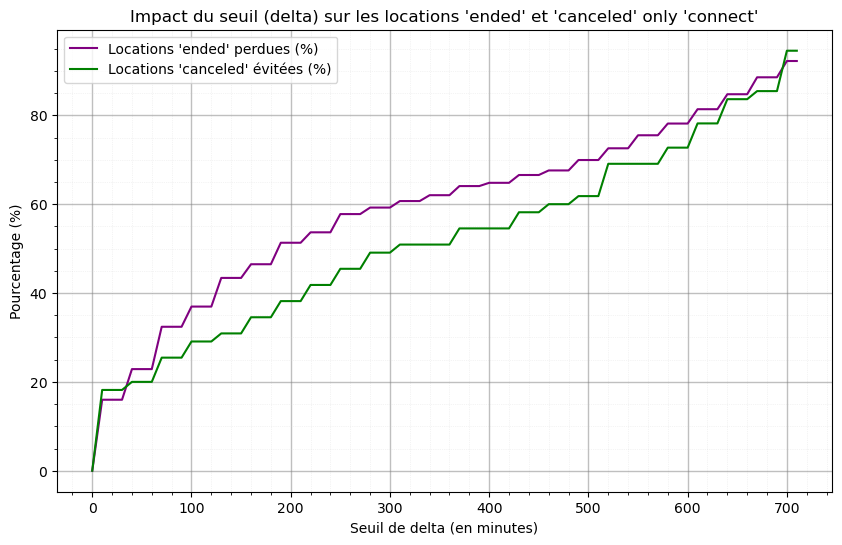

In [93]:
ended_rentals = consecutive_df[(consecutive_df['state'] == 'ended') & (consecutive_df['checkin_type']== 'connect')]

canceled_due_to_delay = consecutive_df[(consecutive_df['state'] == 'canceled') & (consecutive_df['previous_delay_at_checkout_in_minutes'] > 0) & (consecutive_df['checkin_type']== 'connect')]

total_ended = len(ended_rentals)
total_canceled_due_to_delay = len(canceled_due_to_delay)

thresholds = range(0, 720, 10) 
lost_ended_percentage = []
reduced_canceled_percentage = []

for threshold in thresholds:
    count_lost_ended = len(ended_rentals[ended_rentals['time_delta_with_previous_rental_in_minutes'] < threshold])
    lost_ended_percentage.append((count_lost_ended / total_ended) * 100)
    
    count_reduced_canceled = len(canceled_due_to_delay[canceled_due_to_delay['time_delta_with_previous_rental_in_minutes'] < threshold])
    reduced_canceled_percentage.append((count_reduced_canceled / total_canceled_due_to_delay) * 100)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, lost_ended_percentage, linestyle='-', color='purple', label="Locations 'ended' perdues (%)")
plt.plot(thresholds, reduced_canceled_percentage, linestyle='-', color='green', label="Locations 'canceled' évitées (%)")

plt.title("Impact du seuil (delta) sur les locations 'ended' et 'canceled' only 'connect'")
plt.xlabel("Seuil de delta (en minutes)")
plt.ylabel("Pourcentage (%)")
plt.legend()

plt.minorticks_on()
plt.grid(True, which='both', axis='both', linestyle='-', color='gray', alpha=0.5)
plt.grid(True, which='major', linestyle='-', linewidth=1, color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray')

plt.show()

  checkin_type  lost_ended_percentage  reduced_canceled_percentage
0      connect              15.982405                    18.181818
1       mobile              14.516129                    13.725490


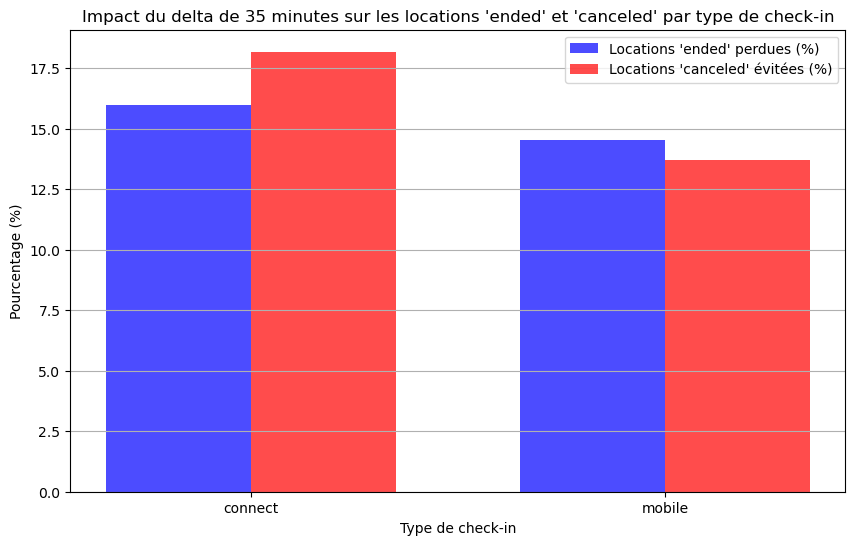

In [107]:
df = consecutive_df 

ended_rentals = df[df['state'] == 'ended']
canceled_due_to_delay = df[(df['state'] == 'canceled') & (df['previous_delay_at_checkout_in_minutes'] > 0)]
delta_threshold = 30  # minutes

results = {
    'checkin_type': [],
    'lost_ended_percentage': [],
    'reduced_canceled_percentage': []
}


for checkin in df['checkin_type'].unique():

    ended_rentals_type = ended_rentals[ended_rentals['checkin_type'] == checkin]
    canceled_due_to_delay_type = canceled_due_to_delay[canceled_due_to_delay['checkin_type'] == checkin]

    count_lost_ended = len(ended_rentals_type[ended_rentals_type['time_delta_with_previous_rental_in_minutes'] < delta_threshold])
    
    count_reduced_canceled = len(canceled_due_to_delay_type[canceled_due_to_delay_type['time_delta_with_previous_rental_in_minutes'] < delta_threshold])
   
    total_ended = len(ended_rentals_type)
    total_canceled = len(canceled_due_to_delay_type)

    lost_ended_percentage = (count_lost_ended / total_ended * 100) if total_ended > 0 else 0
    reduced_canceled_percentage = (count_reduced_canceled / total_canceled * 100) if total_canceled > 0 else 0
    
    results['checkin_type'].append(checkin)
    results['lost_ended_percentage'].append(lost_ended_percentage)
    results['reduced_canceled_percentage'].append(reduced_canceled_percentage)

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
bar_width = 0.35 
index = range(len(results_df['checkin_type']))

plt.bar(index, results_df['lost_ended_percentage'], width=bar_width, alpha=0.7, color='b', label="Locations 'ended' perdues (%)")
plt.bar([i + bar_width for i in index], results_df['reduced_canceled_percentage'], width=bar_width, alpha=0.7, color='r', label="Locations 'canceled' évitées (%)")

plt.title("Impact du delta de 35 minutes sur les locations 'ended' et 'canceled' par type de check-in")
plt.xlabel("Type de check-in")
plt.ylabel("Pourcentage (%)")
plt.xticks([i + bar_width / 2 for i in index], results_df['checkin_type']) 
plt.legend()
plt.grid(axis='y')

plt.show()
